# A. Introduction

Image Caption Generator models is based on encoderdecoder architecture which use input vectors for
generating valid and appropriate captions. This model
bridges gap between natural language processing as well
as computer vision. It’s a task of recognizing and
interpreting the context described in the image and then
describing everything in natural language such as English.
Our model is developed using the two main models i.e.,
CNN (Convolutional Neural Network) and RNN-LSTM
(Recurrent Neural Networks- Long Short-Term Memory).
The encoder in the derived application is CNN which is
used to extract the features from the photograph or image
and RNN-LSTM works as a decoder that is used in
organizing the words and generating captions. Some of the
major applications of the application are self-driving cars
wherein it could describe the scene around the car,
secondly could be an aid to the people who are blind as it
could guide them in every way by converting scene to
caption and then to audio, CCTV cameras where the
alarms could be raised if any malicious activity is observed
while describing the scene, recommendations in editing,
social media posts, and many more

# B. Problem Statement



1.   How Attention Works On Encoder-Decoder Based Architecture ?
2.   How to Implement Attention on Image Captioning ?



# C. Methodology

## 1. Convolutional Neural Network (CNN as Image Encoder)

<p align="center"><img src="https://artificialintelligence.oodles.io/wp-content/uploads/2020/04/A-CNN-is-composed-of-two-basic-parts-of-feature-extraction-and-classification-Feature.png"></p>


The first move is made by CNNs to extract distinct features from an image based on its spatial context. CNNs create dense feature vectors, also called embedding, that is used as an input for the following RNN algorithms. The CNN is fed with images as inputs in different formats including png, jpg, and others. The neural networks compress large amounts of features extracted from the original image into smaller and RNN-compatible feature vector. It is the reason why CNN is also referred to as ‘Encoder’.

## 2. Recurrent Neural Network (RNN as Text Decoder)

<p align="center"><img src="https://miro.medium.com/max/1838/1*UiZX9ZKImH9B3gCp9VVRmw.png"></p>

Post tokenization, the second phase of the model is triggered using LSTM. This step requires an embedding layer for transforming each word into the desired vector and eventually pushed for decoding. With LSTM, the RNN model must be able to remember spatial information from the input feature vector and predict the next word. Now with LSTM performing its tasks, the final output is generated by calling the (get_prediction) function.

## 3. Attention Network as Enrichment Feature Vector

<p align="center"><img src="https://www.kdnuggets.com/wp-content/uploads/Fig2-Chauhan-attention-mechanism-deep-learning-explained.gif"></p>

The idea is to keep the decoder as it is, and we just replace sequential RNN/LSTM with bidirectional RNN/LSTM in the encoder.

Here, we give attention to some words by considering a window size Tx (say four words x1, x2, x3, and x4). Using these four words, we’ll create a context vector c1, which is given as input to the decoder. Similarly, we’ll create a context vector c2 using these four words. Also, we have α1, α2, and α3 as weights, and the sum of all weights within one window is equal to 1.

Similarly, we create context vectors from different sets of words with different α values.

The attention model computes a set of attention weights denoted by α(t,1), α(t,2),..,α(t,t) because not all the inputs would be used in generating the corresponding output. The context vector ci for the output word yi is generated using the weighted sum of the annotations :

<p align="center"><img src="https://www.kdnuggets.com/wp-content/uploads/Fig3-Chauhan-attention-mechanism-deep-learning-explained.jpg"></p>

The attention weights are calculated by normalizing the output score of a feed-forward neural network described by the function that captures the alignment between input at j and output at i.

<p align="center"><img src="https://www.kdnuggets.com/wp-content/uploads/Fig4-Chauhan-attention-mechanism-deep-learning-explained.jpg"></p>

***

<p align="center"><img src="https://www.kdnuggets.com/wp-content/uploads/Fig5-Chauhan-attention-mechanism-deep-learning-explained.jpg"></p>

The picture above is an example of the types of attention networks with the following explanation:

1.   Global Attention: When attention is placed on all source states. In global attention, we require as many weights as the source sentence length.
2.   Local Attention: When attention is placed on a few source states.
3.   Hard Attention: When attention is placed on only one source state.



## 4. Tokenization & Embedding Layer for Text Encoder

<p align="center"><img src="https://artificialintelligence.oodles.io/wp-content/uploads/2020/04/Chollet_DLfT_01.png"></p>



The Final phase brings RNN into the picture for ‘decoding’ the process vector inputs generated by the CNN module. For initiating the task fo captions, the RNN model needs to be trained with a relevant dataset. It is essential to train the RNN model for predicting the next word in the sentence. However, training the model with strings is ineffective without definite numerical alphas values.

For this purpose, it required to convert the image captions into a list of tokenized words as shown below-

# D. Bussiness Approach and Benefit

Image captioning is commonly used as one of AI's innovations in the realm of computer vision, which is useful for finding similarities in images based on object descriptions contained in images, here are some examples of the application of image captioning in the industrial world :

1. Visual Recommendation in Editing Applications
2. Assistance for Visual Impaired
3. Media and Publishing Houses
4. Social Media Posts

# E. Implementation

## 1. Load Flickr Dataset

In [1]:
!unzip /content/drive/MyDrive/Dataset/dataset_image_captioning.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/2844846111_8c1cbfc75d.jpg  
  inflating: Images/2844963839_ff09cdb81f.jpg  
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/2851931813_eaf8ed

In [2]:
# load libraries 
import torch
import numpy as np
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset 

In [3]:
# define custom function
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import spacy
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as T
from PIL import Image

In [4]:
class Vocabulary:
    #tokenizer
    spacy_eng = spacy.load("en_core_web_sm")

    
    def __init__(self,freq_threshold):
        #setting the pre-reserved tokens int to string tokens
        self.itos = {0:"<PAD>",1:"<SOS>",2:"<EOS>",3:"<UNK>"}
        
        #string to int tokens
        #its reverse dict self.itos
        self.stoi = {v:k for k,v in self.itos.items()}
        
        self.freq_threshold = freq_threshold
        
        
        
    def __len__(self): return len(self.itos)
    
    @staticmethod
    def tokenize(text):
        return [token.text.lower() for token in Vocabulary.spacy_eng.tokenizer(text)]
    
    def build_vocab(self, sentence_list):
        frequencies = Counter()
        
        #staring index 4
        idx = 4
        
        for sentence in sentence_list:
            for word in self.tokenize(sentence):
                frequencies[word] += 1
                
                #add the word to the vocab if it reaches minum frequecy threshold
                if frequencies[word] == self.freq_threshold:
                    self.stoi[word] = idx
                    self.itos[idx] = word
                    idx += 1
    
    def numericalize(self,text):
        """ For each word in the text corresponding index token for that word form the vocab built as list """
        tokenized_text = self.tokenize(text)
        return [ self.stoi[token] if token in self.stoi else self.stoi["<UNK>"] for token in tokenized_text ]    

In [5]:
class FlickrDataset(Dataset):
    """
    FlickrDataset
    """
    def __init__(self,root_dir,caption_file,transform=None,freq_threshold=5):
        self.root_dir = root_dir
        self.df = pd.read_csv(caption_file)
        self.transform = transform
        
        #Get image and caption colum from the dataframe
        self.imgs = self.df["image"]
        self.captions = self.df["caption"]
        
        #Initialize vocabulary and build vocab
        self.vocab = Vocabulary(freq_threshold)
        self.vocab.build_vocab(self.captions.tolist())
        
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        caption = self.captions[idx]
        img_name = self.imgs[idx]
        img_location = os.path.join(self.root_dir,img_name)
        img = Image.open(img_location).convert("RGB")
        
        #apply the transfromation to the image
        if self.transform is not None:
            img = self.transform(img)
        
        #numericalize the caption text
        caption_vec = []
        caption_vec += [self.vocab.stoi["<SOS>"]]
        caption_vec += self.vocab.numericalize(caption)
        caption_vec += [self.vocab.stoi["<EOS>"]]
        
        return img, torch.tensor(caption_vec)

In [6]:
class CapsCollate:
    """
    Collate to apply the padding to the captions with dataloader
    """
    def __init__(self,pad_idx,batch_first=False):
        self.pad_idx = pad_idx
        self.batch_first = batch_first
    
    def __call__(self,batch):
        imgs = [item[0].unsqueeze(0) for item in batch]
        imgs = torch.cat(imgs,dim=0)
        
        targets = [item[1] for item in batch]
        targets = pad_sequence(targets, batch_first=self.batch_first, padding_value=self.pad_idx)
        return imgs,targets

In [7]:
def get_data_loader(dataset,batch_size,shuffle=False,num_workers=1):
    """
    Returns torch dataloader for the flicker8k dataset
    
    Parameters
    -----------
    dataset: FlickrDataset
        custom torchdataset named FlickrDataset 
    batch_size: int
        number of data to load in a particular batch
    shuffle: boolean,optional;
        should shuffle the datasests (default is False)
    num_workers: int,optional
        numbers of workers to run (default is 1)  
    """

    pad_idx = dataset.vocab.stoi["<PAD>"]
    collate_fn = CapsCollate(pad_idx=pad_idx,batch_first=True)

    data_loader = DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=num_workers,
        collate_fn=collate_fn
    )

    return data_loader

In [8]:
def show_image(img, title=None):
    """
    imshow for Tensor.
    """
    #unnormalize 
    img[0] = img[0] * 0.229
    img[1] = img[1] * 0.224 
    img[2] = img[2] * 0.225 
    img[0] += 0.485 
    img[1] += 0.456 
    img[2] += 0.406
    
    img = img.numpy().transpose((1, 2, 0))
    
    
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

## 2. Image Preprocessing

In [9]:
# define global configuration
data_location = "/content/Images"
BATCH_SIZE    = 256
NUM_WORKER    = 2

# define image preprocessing
transforms = T.Compose(
    [
        T.Resize(256),
        T.RandomCrop(224),
        T.ToTensor(), 
        T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ]
)

# inherit dataset class 
dataset = FlickrDataset(
    root_dir = data_location,
    caption_file = "/content/captions.txt", 
    transform = transforms
)

In [10]:
# define data loader 
data_loader = get_data_loader(
    dataset = dataset, 
    batch_size = BATCH_SIZE, 
    num_workers = NUM_WORKER, 
    shuffle = True
)

# define vocabulary size
vocab_size = len(dataset.vocab)

In [11]:
# get defive information
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

## 3. Model Architecture (Attention)

In [12]:
# reload libraries
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision.models as models
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as T

In [13]:
class EncoderCNN(nn.Module):
    def __init__(self):
        super(EncoderCNN, self).__init__()
        resnet = models.resnet50(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad_(False)
        
        modules = list(resnet.children())[:-2]
        self.resnet = nn.Sequential(*modules)
        
    def forward(self, images):
        features = self.resnet(images)                                    #(batch_size,2048,7,7)
        features = features.permute(0, 2, 3, 1)                           #(batch_size,7,7,2048)
        features = features.view(features.size(0), -1, features.size(-1)) #(batch_size,49,2048)
        return features

In [14]:
class Attention(nn.Module):
    def __init__(self, encoder_dim,decoder_dim,attention_dim):
        super(Attention, self).__init__()
        
        self.attention_dim = attention_dim
        
        self.W = nn.Linear(decoder_dim,attention_dim)
        self.U = nn.Linear(encoder_dim,attention_dim)
        
        self.A = nn.Linear(attention_dim,1)
        
    def forward(self, features, hidden_state):
        u_hs = self.U(features)     #(batch_size,num_layers,attention_dim)
        w_ah = self.W(hidden_state) #(batch_size,attention_dim)
        
        combined_states = torch.tanh(u_hs + w_ah.unsqueeze(1)) #(batch_size,num_layers,attemtion_dim)
        
        attention_scores = self.A(combined_states)         #(batch_size,num_layers,1)
        attention_scores = attention_scores.squeeze(2)     #(batch_size,num_layers)
        
        alpha = F.softmax(attention_scores,dim=1)          #(batch_size,num_layers)
        
        attention_weights = features * alpha.unsqueeze(2)  #(batch_size,num_layers,features_dim)
        attention_weights = attention_weights.sum(dim=1)   #(batch_size,num_layers)
        
        return alpha,attention_weights

In [15]:
class DecoderRNN(nn.Module):
    def __init__(self,embed_size, vocab_size, attention_dim,encoder_dim,decoder_dim,drop_prob=0.3):
        super().__init__()
        
        #save the model param
        self.vocab_size = vocab_size
        self.attention_dim = attention_dim
        self.decoder_dim = decoder_dim
        
        self.embedding = nn.Embedding(vocab_size,embed_size)
        self.attention = Attention(encoder_dim,decoder_dim,attention_dim)
        
        self.init_h = nn.Linear(encoder_dim, decoder_dim)  
        self.init_c = nn.Linear(encoder_dim, decoder_dim)  
        self.lstm_cell = nn.LSTMCell(embed_size+encoder_dim,decoder_dim,bias=True)
        self.f_beta = nn.Linear(decoder_dim, encoder_dim)
        
        self.fcn = nn.Linear(decoder_dim,vocab_size)
        self.drop = nn.Dropout(drop_prob)
        
    def forward(self, features, captions):
        
        #vectorize the caption
        embeds = self.embedding(captions)
        
        # Initialize LSTM state
        h, c = self.init_hidden_state(features)  # (batch_size, decoder_dim)
        
        #get the seq length to iterate
        seq_length = len(captions[0])-1 #Exclude the last one
        batch_size = captions.size(0)
        num_features = features.size(1)
        
        preds = torch.zeros(batch_size, seq_length, self.vocab_size).to(device)
        alphas = torch.zeros(batch_size, seq_length,num_features).to(device)
                
        for s in range(seq_length):
            alpha,context = self.attention(features, h)
            lstm_input = torch.cat((embeds[:, s], context), dim=1)
            h, c = self.lstm_cell(lstm_input, (h, c))
                    
            output = self.fcn(self.drop(h))
            
            preds[:,s] = output
            alphas[:,s] = alpha  
        
        
        return preds, alphas
    
    def generate_caption(self,features,max_len=20,vocab=None):
        # Inference part
        # Given the image features generate the captions
        
        batch_size = features.size(0)
        h, c = self.init_hidden_state(features)  # (batch_size, decoder_dim)
        
        alphas = []
        
        #starting input
        word = torch.tensor(vocab.stoi['<SOS>']).view(1,-1).to(device)
        embeds = self.embedding(word)

        
        captions = []
        
        for i in range(max_len):
            alpha,context = self.attention(features, h)
            
            #store the apla score
            alphas.append(alpha.cpu().detach().numpy())
            
            lstm_input = torch.cat((embeds[:, 0], context), dim=1)
            h, c = self.lstm_cell(lstm_input, (h, c))
            output = self.fcn(self.drop(h))
            output = output.view(batch_size,-1)
        
            #select the word with most val
            predicted_word_idx = output.argmax(dim=1)
            
            #save the generated word
            captions.append(predicted_word_idx.item())
            
            #end if <EOS detected>
            if vocab.itos[predicted_word_idx.item()] == "<EOS>":
                break
            
            #send generated word as the next caption
            embeds = self.embedding(predicted_word_idx.unsqueeze(0))
        
        #covert the vocab idx to words and return sentence
        return [vocab.itos[idx] for idx in captions],alphas
    
    def init_hidden_state(self, encoder_out):
        mean_encoder_out = encoder_out.mean(dim=1)
        h = self.init_h(mean_encoder_out)  # (batch_size, decoder_dim)
        c = self.init_c(mean_encoder_out)
        return h, c

In [16]:
class EncoderDecoder(nn.Module):
    def __init__(self,embed_size, vocab_size, attention_dim,encoder_dim,decoder_dim,drop_prob=0.3):
        super().__init__()
        self.encoder = EncoderCNN()
        self.decoder = DecoderRNN(
            embed_size=embed_size,
            vocab_size = len(dataset.vocab),
            attention_dim=attention_dim,
            encoder_dim=encoder_dim,
            decoder_dim=decoder_dim
        )
        
    def forward(self, images, captions):
        features = self.encoder(images)
        outputs = self.decoder(features, captions)
        return outputs

### 3.1. Hyperparameter Configuration

In [17]:
# hyperparameter configuration
embed_size    = 300
vocab_size    = len(dataset.vocab)
attention_dim = 256
encoder_dim   = 2048
decoder_dim   = 512
learning_rate = 3e-4

In [18]:
# define attention model
model = EncoderDecoder(
    embed_size    = 300,
    vocab_size    = len(dataset.vocab),
    attention_dim = 256,
    encoder_dim   = 2048,
    decoder_dim   = 512
).to(device)

# define loss and optimizer
criterion = nn.CrossEntropyLoss(ignore_index=dataset.vocab.stoi["<PAD>"])
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
num_epochs = 1

# training model
for epoch in range(1,num_epochs+1):   
    for idx, (image, captions) in enumerate(iter(data_loader)):
        image, captions = image.to(device), captions.to(device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
captions

tensor([[   1,   97,   34,  243,    4,   53,  171,    8,   10,  215,    5,    2,
            0,    0,    0,    0,    0,    0],
        [   1,    4,   14,    8,   20,  302,  394, 1569,   76,   44,    5,    2,
            0,    0,    0,    0,    0,    0],
        [   1,    4,   20,  312,   41,   12,    4,   21,  564,   47,   27,    4,
          847,   59,    5,    2,    0,    0],
        [   1,    3,  650,    3,   99, 1939,   13,    4,  197,  470,    5,    2,
            0,    0,    0,    0,    0,    0],
        [   1,   43,   12,   20,   83,   16,   26, 2897,  221,  407,  514,   19,
           36,   13,   36,   42,    5,    2],
        [   1,    4,   21,    6,  442,    4,   21,   36,    8,  136,   62,    5,
            2,    0,    0,    0,    0,    0],
        [   1,    4,    7,   75,    8,   10,  105,  376,    5,    2,    0,    0,
            0,    0,    0,    0,    0,    0]], device='cuda:0')

In [ ]:
# feed forward model by dummies data.
yhat = model(image, captions)

In [ ]:
# !pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=e6447f3cb5fef236704d00af346bc7effe5dbe5a57bba8283ce3b2d5b0868a3b
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [ ]:
from torchviz import make_dot

make_dot(yhat, params=dict(list(model.named_parameters()))).render("attention_torchviz", format="png")

'rnn_torchviz.png'

![](/content/rnn_torchviz.png)

In [19]:
# overview 
print(model)

EncoderDecoder(
  (encoder): EncoderCNN(
    (resnet): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
 

In [20]:
# define helper function to save model
def save_model(model,num_epochs):
    model_state = {
        'num_epochs':num_epochs,
        'embed_size':embed_size,
        'vocab_size':len(dataset.vocab),
        'attention_dim':attention_dim,
        'encoder_dim':encoder_dim,
        'decoder_dim':decoder_dim,
        'state_dict':model.state_dict()
    }

    torch.save(model_state, 'attention_model_state.pth')

### 3.2. Training Model Attention

In [21]:
# import libraries 
from tqdm import tqdm

# define training configuration
num_epochs  = 25
print_every = 100

Training Per Epochs ::   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 loss: 3.18632


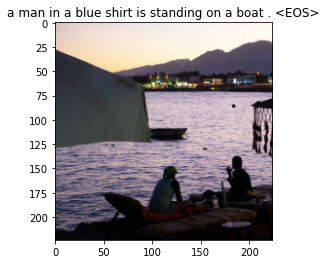

Training Per Epochs ::   4%|▍         | 1/25 [06:04<2:25:41, 364.23s/it]

Epoch: 2 loss: 3.03638


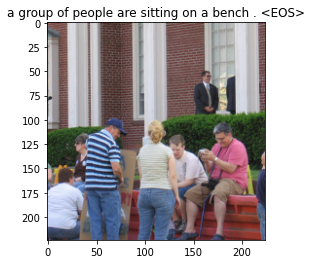

Training Per Epochs ::   8%|▊         | 2/25 [12:03<2:18:24, 361.08s/it]

Epoch: 3 loss: 2.83647


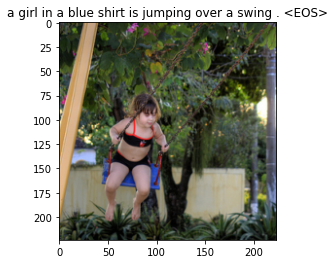

Training Per Epochs ::  12%|█▏        | 3/25 [18:04<2:12:26, 361.22s/it]

Epoch: 4 loss: 2.78992


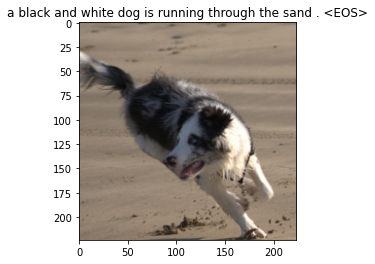

Training Per Epochs ::  16%|█▌        | 4/25 [24:04<2:06:15, 360.74s/it]

Epoch: 5 loss: 2.70897


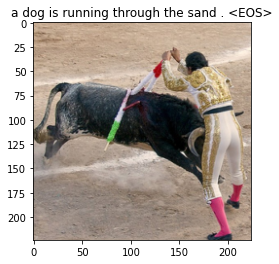

Training Per Epochs ::  20%|██        | 5/25 [30:02<1:59:57, 359.89s/it]

Epoch: 6 loss: 2.68510


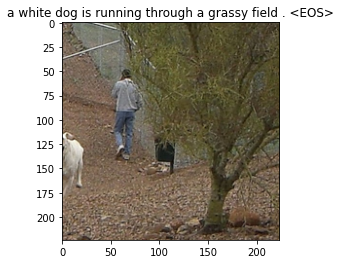

Training Per Epochs ::  24%|██▍       | 6/25 [35:57<1:53:25, 358.16s/it]

Epoch: 7 loss: 2.63304


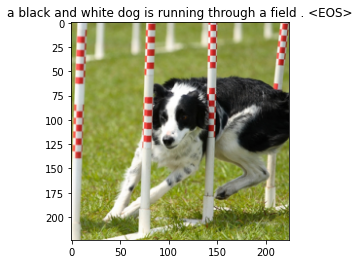

Training Per Epochs ::  28%|██▊       | 7/25 [41:56<1:47:29, 358.29s/it]

Epoch: 8 loss: 2.54909


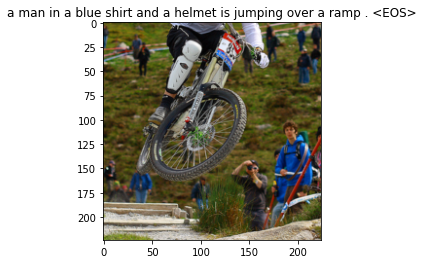

Training Per Epochs ::  32%|███▏      | 8/25 [47:53<1:41:25, 358.00s/it]

Epoch: 9 loss: 2.40788


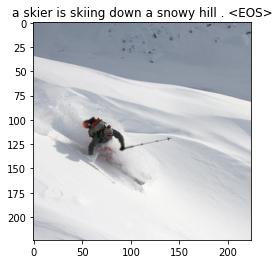

Training Per Epochs ::  36%|███▌      | 9/25 [53:50<1:35:22, 357.65s/it]

Epoch: 10 loss: 2.46099


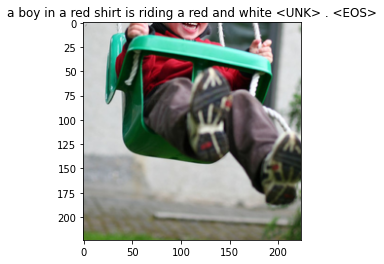

Training Per Epochs ::  40%|████      | 10/25 [59:49<1:29:29, 357.97s/it]

Epoch: 11 loss: 2.48102


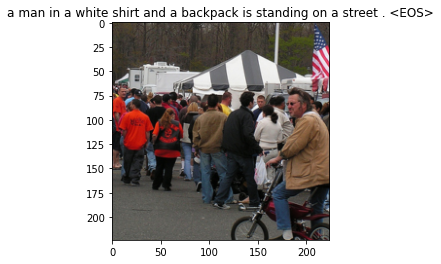

Training Per Epochs ::  44%|████▍     | 11/25 [1:05:45<1:23:25, 357.56s/it]

Epoch: 12 loss: 2.42839


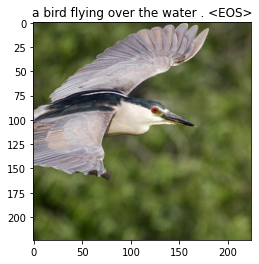

Training Per Epochs ::  48%|████▊     | 12/25 [1:11:41<1:17:20, 356.94s/it]

Epoch: 13 loss: 2.36626


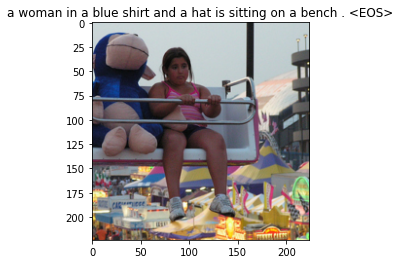

Training Per Epochs ::  52%|█████▏    | 13/25 [1:17:40<1:11:32, 357.69s/it]

Epoch: 14 loss: 2.39160


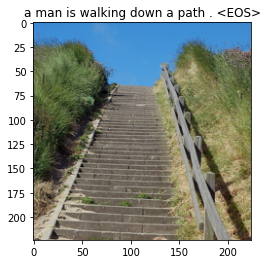

Training Per Epochs ::  56%|█████▌    | 14/25 [1:23:38<1:05:34, 357.68s/it]

Epoch: 15 loss: 2.29496


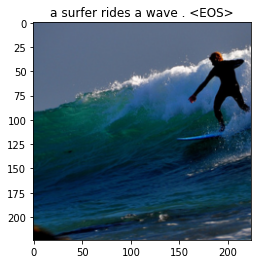

Training Per Epochs ::  60%|██████    | 15/25 [1:29:36<59:38, 357.88s/it]  

Epoch: 16 loss: 2.28897


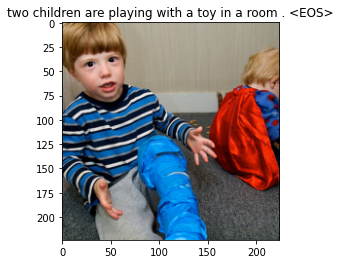

Training Per Epochs ::  64%|██████▍   | 16/25 [1:35:32<53:34, 357.21s/it]

Epoch: 17 loss: 2.26862


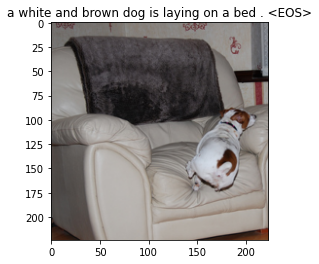

Training Per Epochs ::  68%|██████▊   | 17/25 [1:41:29<47:37, 357.14s/it]

Epoch: 18 loss: 2.30162


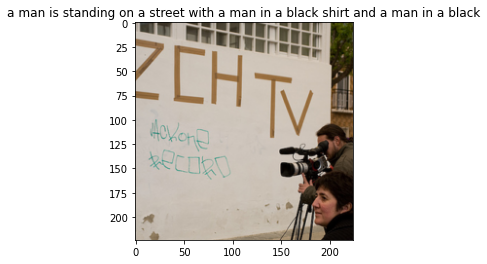

Training Per Epochs ::  72%|███████▏  | 18/25 [1:47:26<41:40, 357.27s/it]

Epoch: 19 loss: 2.22451


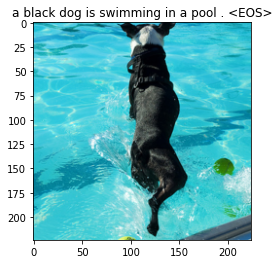

Training Per Epochs ::  76%|███████▌  | 19/25 [1:53:23<35:42, 357.11s/it]

Epoch: 20 loss: 2.33022


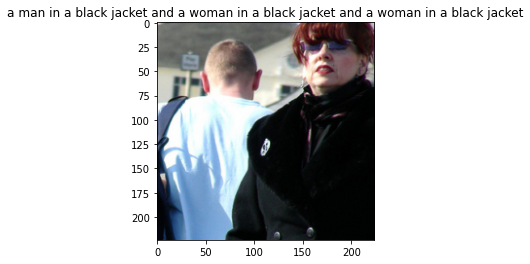

Training Per Epochs ::  80%|████████  | 20/25 [1:59:19<29:44, 356.85s/it]

Epoch: 21 loss: 2.16799


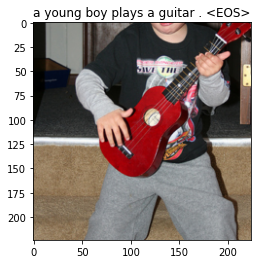

Training Per Epochs ::  84%|████████▍ | 21/25 [2:05:06<23:35, 353.88s/it]

Epoch: 22 loss: 2.19949


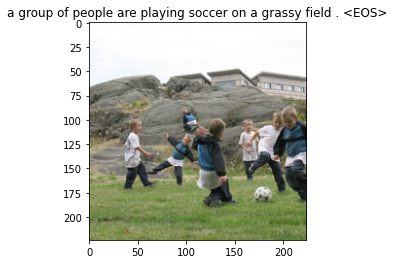

Training Per Epochs ::  88%|████████▊ | 22/25 [2:11:06<17:46, 355.59s/it]

Epoch: 23 loss: 2.20917


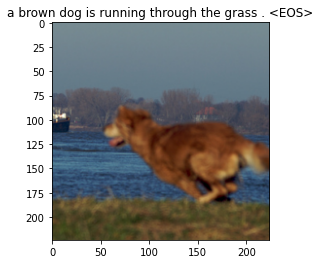

Training Per Epochs ::  92%|█████████▏| 23/25 [2:17:06<11:53, 356.94s/it]

Epoch: 24 loss: 2.09458


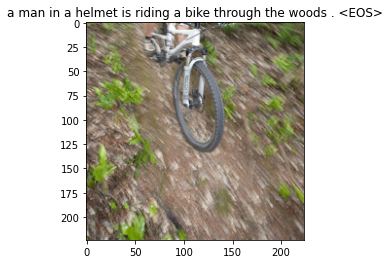

Training Per Epochs ::  96%|█████████▌| 24/25 [2:23:14<06:00, 360.21s/it]

Epoch: 25 loss: 2.20923


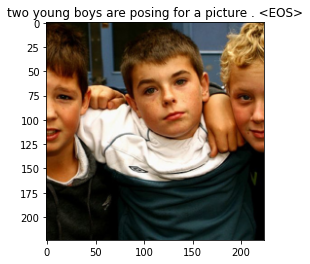

Training Per Epochs :: 100%|██████████| 25/25 [2:29:18<00:00, 358.34s/it]


In [23]:
# list loss
losses = []

# training model
for epoch in tqdm(range(1,num_epochs+1), desc = "Training Per Epochs :"):   
    for idx, (image, captions) in enumerate(iter(data_loader)):
        image,captions = image.to(device),captions.to(device)

        # Zero the gradients.
        optimizer.zero_grad()

        # Feed forward
        outputs, attentions = model(image, captions)

        # Calculate the batch loss.
        targets = captions[:,1:]
        loss = criterion(outputs.view(-1, vocab_size), targets.reshape(-1))
        
        # Backward pass.
        loss.backward()

        # Update the parameters in the optimizer.
        optimizer.step()

        if (idx+1)%print_every == 0:
            print("Epoch: {} loss: {:.5f}".format(epoch,loss.item()))
            losses.append(loss.item())
            
            #generate the caption
            model.eval()
            with torch.no_grad():
                dataiter = iter(data_loader)
                img,_ = next(dataiter)
                features = model.encoder(img[0:1].to(device))
                caps,alphas = model.decoder.generate_caption(features,vocab=dataset.vocab)
                caption = ' '.join(caps)
                show_image(img[0],title=caption)
                
            model.train()
        
    #save the latest model
    save_model(model,epoch)

# F. Conclusion and Improvement

## 1. Conclusion

In this project, I implemented an attention network on the CRNN network where CNN as an image encoder, RNN for a text encoder, and LSTM as a sequence text reminder, with the addition of implementing an attention network that is useful for spreading feature vectors at the LSTM layer successfully reducing the loss value (epoch 1 : 3.18632) to (epoch 25: 2.20923) with a reduced loss margin of 0.997 at 25 epochs for almost 2 hours using a Tesla P4 GPU and 2 workers.

## 2. Improvement

The following are some examples of additional implementations that can improve the value of losses to be smaller:

1.   Using more number of epochs
2.   In text embedding, it is better to use a Bert / GPT type model so that the results of text tokenization are more varied
3.   Using a larger number of datasets and applying the CLIP model so that the impact of visual contrastive learning is linear with the function of the text encoder so that the LSTM network has a unique sequence for each image and text description

